##<font color='blue'>**Downloading the required library**</font>

In [1]:
pip install wordcloud

##<font color='blue'>**Importing the libraries**</font>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

##<font color='blue'>**Loading the dataset**</font>

In [3]:
df=pd.read_csv('/content/indian_food.csv')

In [4]:
df.head(15)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


##<font color='blue'>**Data Analysis and Data Pre processing**</font>

In [5]:
df.shape

(255, 9)

<font color='red'>**In this dataset there are 255 rows i.e datapoints and 9 columns i.e features. The features are :-**

*   Name of the dish
*   Ingredients
*   Diet
*   Preparation time
*   Cooking time
*   Flavour profile
*   Course
*   State to which the dish belongs
*   Region in which the state is located</font>













In [6]:
# In the dataset the missing values are represented by -1. Since we use NaN to represent missing values all -1 are replaced by NaN

df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)
df.head(20)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10.0,50.0,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10.0,20.0,sweet,dessert,NaN,NaN
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20.0,30.0,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10.0,40.0,sweet,dessert,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            255 non-null    object 
 1   ingredients     255 non-null    object 
 2   diet            255 non-null    object 
 3   prep_time       225 non-null    float64
 4   cook_time       227 non-null    float64
 5   flavor_profile  226 non-null    object 
 6   course          255 non-null    object 
 7   state           231 non-null    object 
 8   region          241 non-null    object 
dtypes: float64(2), object(7)
memory usage: 18.1+ KB


<font color='red'>**There are 2 features which are integer type and the rest 7 are object data type. There are some NaN values in the cook time, flavour profile, state and region.**</font>

##<font color='blue'>**Data Visualization**

###<font color='Magenta'>**Observing the distribution of vegetarian and non-vegetarian dishes**

In [8]:
# Returns the count of vegetarian and no vegetarian dishes

s=df['diet'].value_counts()
s

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

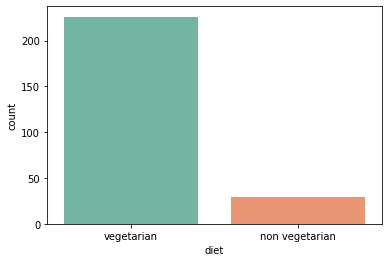

In [9]:
# Using a count plot that plots the above information in the form of a graph

sns.countplot(x="diet", data=df,palette="Set2")


<font color='red'>**Here we can observe that the number of vegetarian dishes is very high as compared to the non-vegetarian dishes**</font>

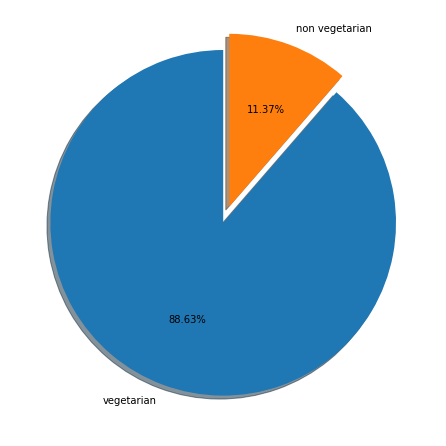

In [10]:
# Let's try to visualize that informtion using a pie chart 

pie_data = df.diet.value_counts().reset_index()
pie_data.columns = ['diet','count']
explode = (0, 0.1) # Explode increases the separation making it easier to visualize

fig=plt.figure(figsize=(6,6)) # Assigning the size of the figure
ax = fig.add_axes([0,0,1,1]) # Enables arbitrary layouts of axes on figure by taking the dimension of the new axes as [left,right,width,height] 

ax.pie(pie_data['count'], labels=pie_data['diet'],explode=explode,shadow=True,autopct='%1.2f%%',startangle=90) # Plots a pie chart
plt.show()


<font color='red'>**Here we get the same observation that the number of vegetarian dishes is very high as compared to the non-vegetarian dishes but now it's expressed in terms of percentage. 88.63% of the total dishes are vegetarian and the rest 11.37% are non-vegetarian.**</font>

###<font color='Magenta'>**Observing the distribution of the different flavour profiles**</font>

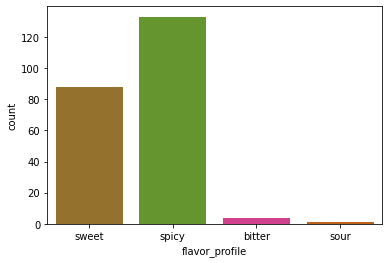

In [11]:
# Count plot plots the number of dishes belonging to each flavour profile

sns.countplot(x="flavor_profile", data=df,palette="Dark2_r")

<font color='red'>**The dominant flavour profile is spicy followed by sweet whereas the other two flavours i.e bitter and sour are very less in number. Well being the world's largest producer, consumer and exporter of spices it's pretty natural that the dominant flavour profile in Indian food is spicy**</font>

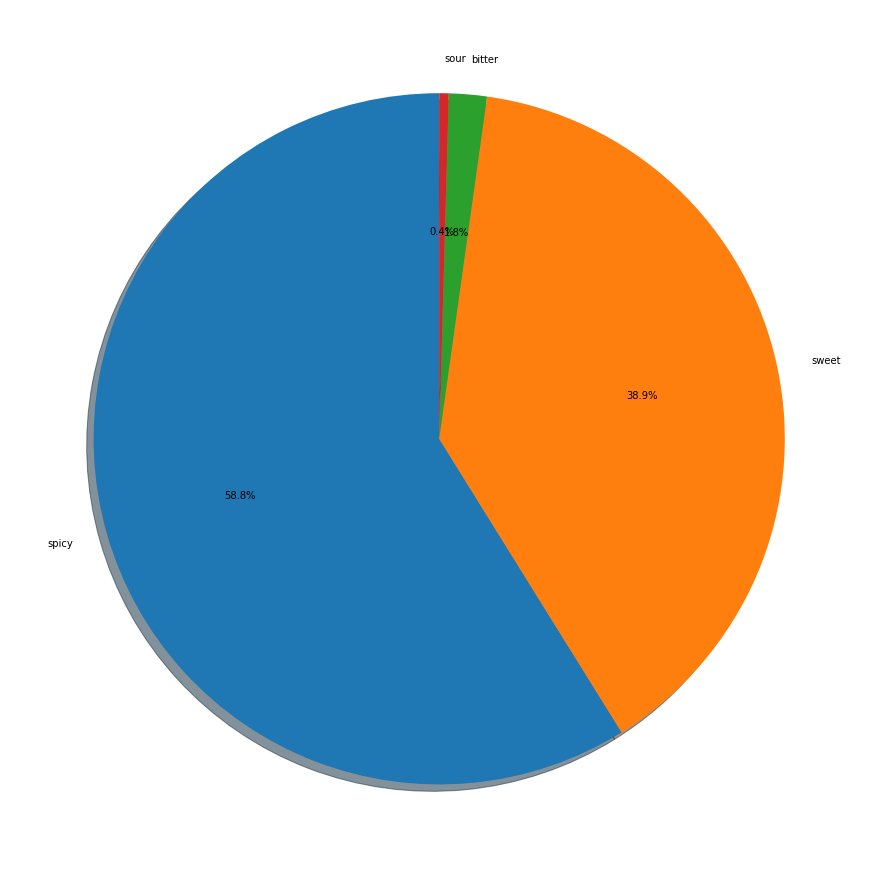

In [12]:
# Let's try to visualize that informtion using a pie chart 

pie_data = df['flavor_profile'].value_counts().reset_index()
pie_data.columns = ['flavor_profile','count']

fig=plt.figure(figsize=(12,12))
ax = fig.add_axes([0,0,1,1])

ax.pie(pie_data['count'], labels=pie_data['flavor_profile'],shadow=True,autopct='%1.1f%%',startangle=90)
plt.show()

<font color='red'>**Nearly 58.8% of the dishes are spicy pointing to the fact that the dominant flavour profile is Spicy, closely followed by sweet (approx 38.9%). However the number of dishes belonging to the other two flavour profiles i.e. bitter and sour are quite less in number. Indians surely does love spicy food and have sweet tooth as well**</font>

###<font color='Magenta'>**Observing the distribution of the different courses**</font>

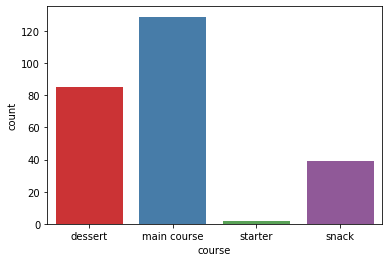

In [13]:
sns.countplot(x="course", data=df,palette="Set1")

<font color='red'>**The number of main course dishes is the highest, followed by dessert and snacks whereas the number of starters is very less.**</font>

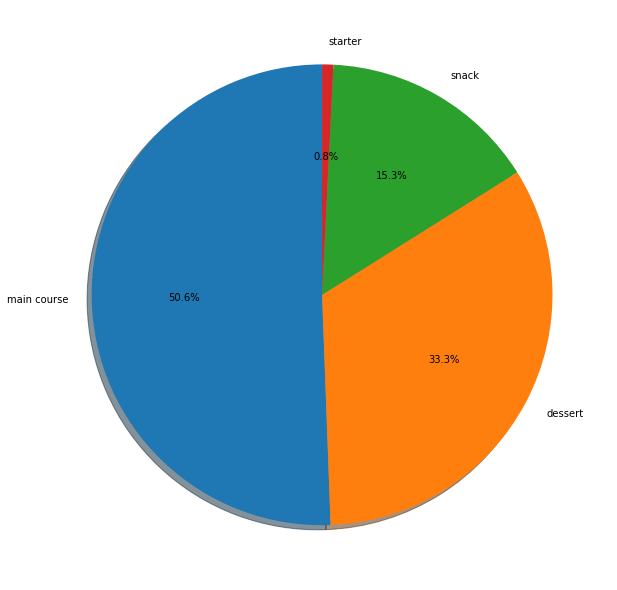

In [14]:
pie_data = df['course'].value_counts().reset_index()
pie_data.columns = ['course','count']

fig=plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])

ax.pie(pie_data['count'], labels=pie_data['course'],shadow=True,autopct='%1.1f%%',startangle=90)
plt.show()

<font color='red'>**About 50.6% of the dishes belong to main course, followed by 33.3% being desserts and then 15.3% being snacks. The percentage of starter dishes is really low though.**</font>

###<font color='Magenta'>**Observing the distribution of the dishes across different regions**</font>

In [15]:
#Let's observe the states that belong to each group

groups=df.groupby(['region'])
for name,group in groups:
  print(name)
  s=set(group['state'])
  print(s)

Central
{'Madhya Pradesh', 'Chhattisgarh'}
East
{'West Bengal', 'Odisha'}
North
{nan, 'Haryana', 'Uttar Pradesh', 'NCT of Delhi', 'Bihar', 'Uttarakhand', 'Punjab', 'Jammu & Kashmir'}
North East
{'Assam', 'Tripura', 'Nagaland', 'Manipur'}
South
{nan, 'Kerala', 'Telangana', 'Karnataka', 'Andhra Pradesh', 'Tamil Nadu'}
West
{'Maharashtra', 'Goa', 'Gujarat', 'Rajasthan'}


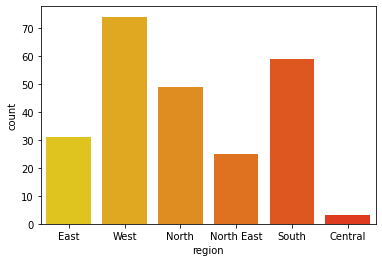

In [16]:
sns.countplot(x="region", data=df,palette="autumn_r")

<font color='red'>**The dataset has more information on dishes from the Western,Southern and Northern region of India but quite less for the Eastern, North-eastern and Central region of India.**</font>

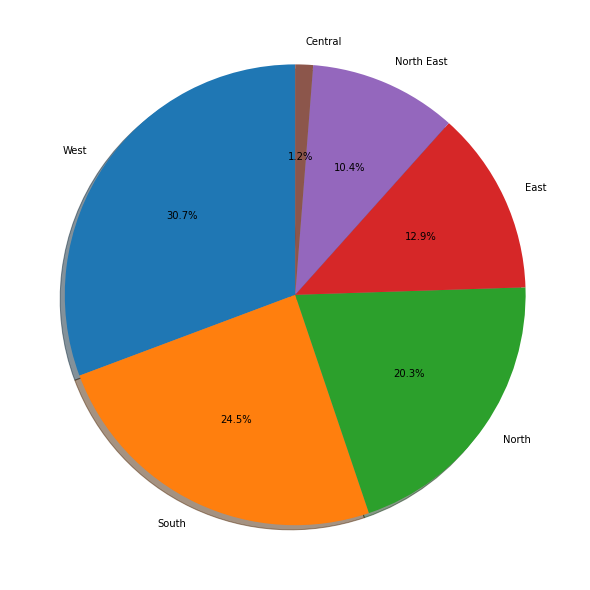

In [17]:
pie_data = df['region'].value_counts().reset_index()
pie_data.columns = ['region','count']

fig=plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])

ax.pie(pie_data['count'], labels=pie_data['region'],shadow=True,autopct='%1.1f%%',startangle=90)
plt.show()

<font color='red'>**The distribution of dishes in the dataset is not uniform because the dishes present here mostly belong to the Western (30.7%),Southern(24.5%) and Northern(20.3%) region of India but quite less for the Eastern(12.9%), North-eastern(10.4%) and Central(1.2%) region of India.**</font>

###<font color='Magenta'>**Let's consider two features at a time**</font>

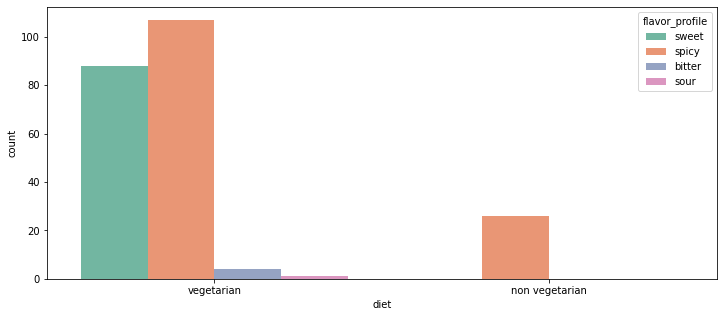

In [18]:
fig=plt.figure(figsize=(12,5)) # To increase the size of the figure so that the informations are clearly visible
sns.countplot(x="diet",hue='flavor_profile', data=df,palette="Set2")


<font color='red'>**All the non-vegetarian dishes belong to the spicy flavour profile which is exactly how we Indians love our non-vegetarian food. However in the vegetarian dishes also spicy and sweet are the dominant flvours. Thus be it non vegetarian or vegetarian dishes spicy food is the favourite**</font>

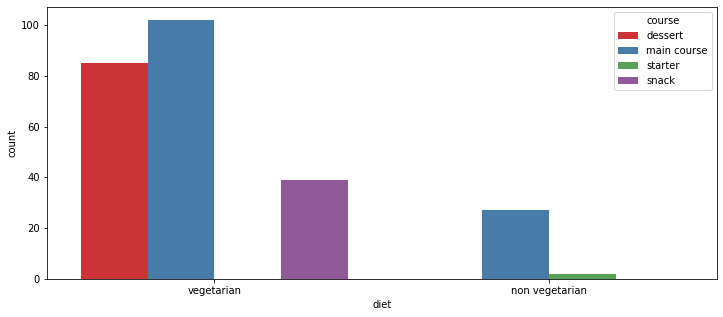

In [19]:
fig=plt.figure(figsize=(12,5))
sns.countplot(x="diet",hue='course', data=df,palette="Set1")

<font color='red'>**All the vegetarian dishes are mostly main course items followed by dessert and snacks. However we don't have information about vegetarian starters. In the non vegetarian section we have only main course and starter items.**</font>

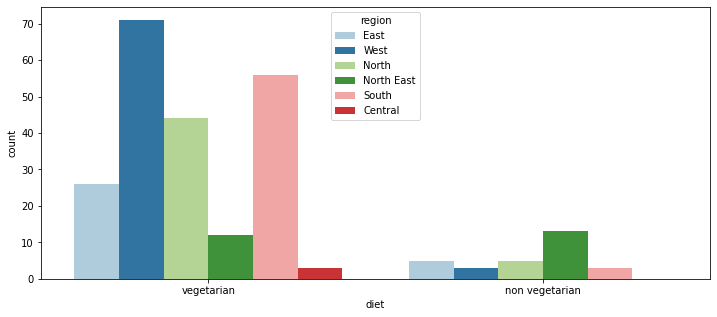

In [20]:
fig=plt.figure(figsize=(12,5))
sns.countplot(x="diet",hue='region', data=df,palette="Paired")

<font color='red'>**It can be observed that:-**</font>

*   **<font color='green'>Most of the vegetarian dishes belong to the Western region. The states included in this region are Maharashtra, Goa, Gujarat and Rajasthan. Well according to a report by RGI, Rajasthan has the highest number of vegetarians(74.9%), followed by Gujarat(60.95%) and Maharasthra(40.2%). Thus this observation is pretty justified**
*   **The region with the second highest vegetarian dishes is South that includes Kerala, Telangana, Andhra Pradesh, Karnataka and Tamil Nadu which too have a lot of vegetarians like Karnataka(21.1%), Kerala(3%),Tamil Nadu(2.35%),Andhra Pradesh(1.75%),Telangana(1.3%).**
*   **Smilaryly for the non-vegetarian dihes North-East region leads the chart closely followed by East and North region. This includes states like Assam, Tripura, West Bengal,Odisha, UP etc**</font>

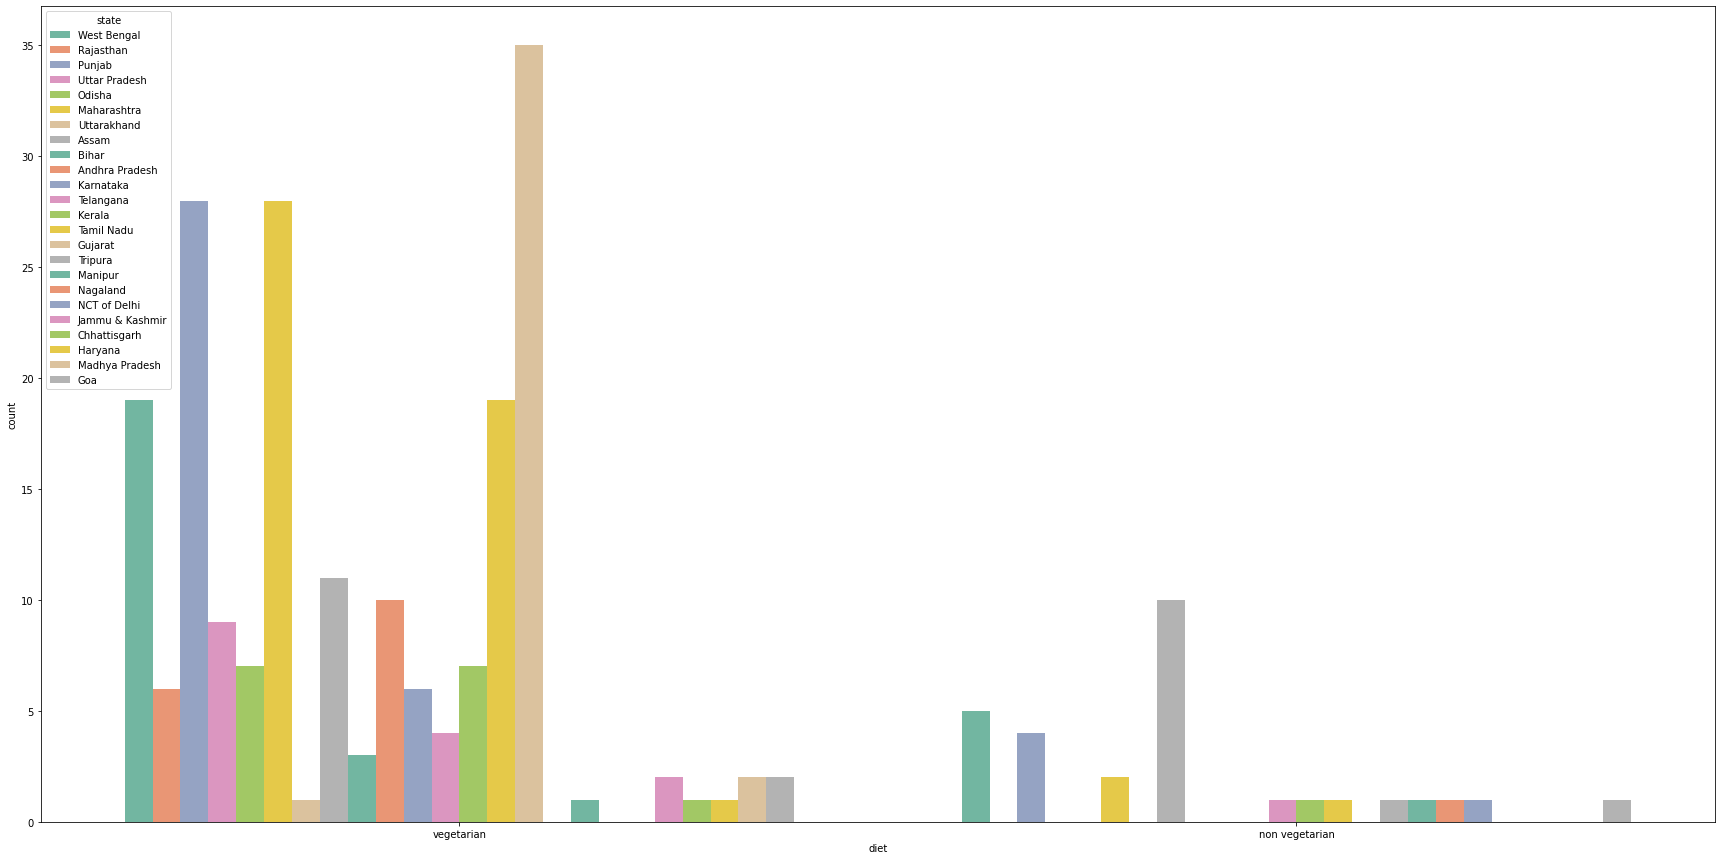

In [27]:
fig=plt.figure(figsize=(30,15))
sns.countplot(x="diet",hue='state', data=df,palette='Set2')

<font color='red'>**It can be observed that:-**</font>

*   **<font color='green'>The state with the highest number of vegetarian dishes is Gujarat, followed by Punjab and Maharashtra**
*   **For the non vegetarian dishes Assam and West Bengal are leading the charts**</font>

###<font color='Magenta'>**Observing how the cooking time and preparation time varies**</font>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


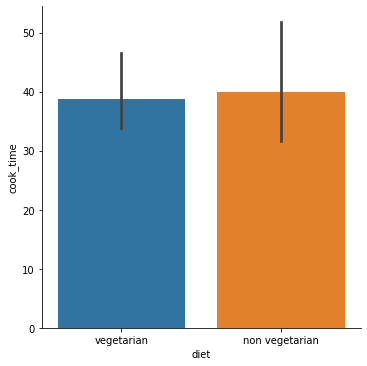

In [28]:
sns.factorplot(data=df,x='diet',y='cook_time',kind='bar')

<font color='red'>**Well it can be observed that the cooking time doesn't vary much with the diet type since the average cooking time in both the cases is pretty close to 40 mins**</font>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


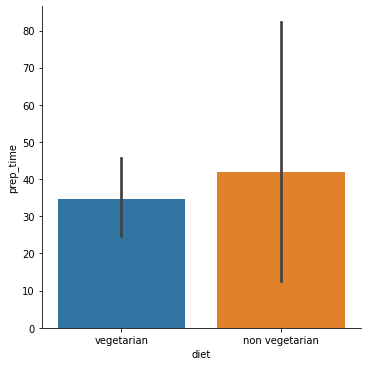

In [29]:
sns.factorplot(data=df,x='diet',y='prep_time',kind='bar')

<font color='red'>**In case of preparation time the average preparation time for non vegatarian dishes(approx 40 mins) is slightly more than the vegetarain dishes(approx 35 mins).**</font>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


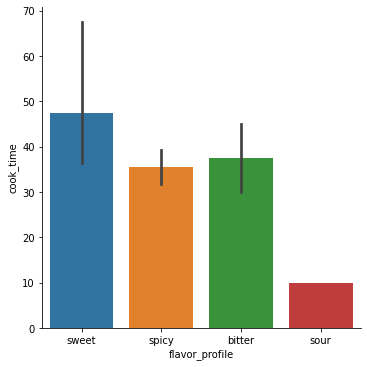

In [35]:
sns.factorplot(data=df,x='flavor_profile',y='cook_time',kind='bar')

<font color='red'>**It can be observed that the cooking time varies considerably with the flavour profile. The cooking time for sweet dishes(approx 48-49 mins) is the highest.Spicy and bitter dishes take almost similar time around 28-40 mins. Sour items take the least time around 10 mins.**</font>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


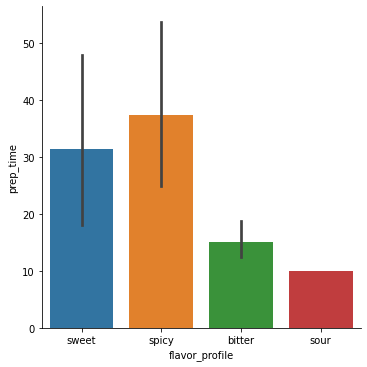

In [36]:
sns.factorplot(data=df,x='flavor_profile',y='prep_time',kind='bar')

<font color='red'>**It can be observed that the preparation time varies considerably with the flavour profile. Preparation time for spicy dishes is the highest around 38-39 mins.For sweet items preparation time is around 32 mins but bitter and sour dishes have the least preparartion time.**</font>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


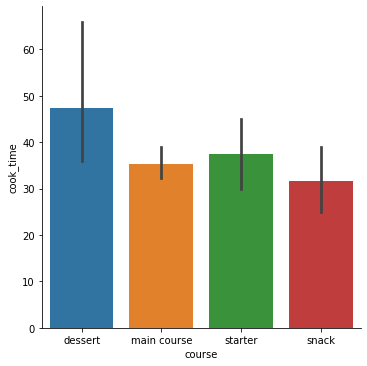

In [39]:
sns.factorplot(data=df,x='course',y='cook_time',kind='bar')

<font color='red'>**It can be observed that the cooking time do vary with the course. Desserts take comparatively higher cooking time than other type of courses.**</font>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


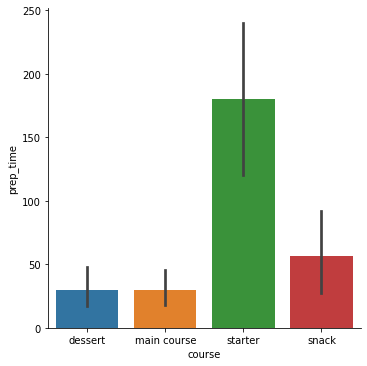

In [40]:
sns.factorplot(data=df,x='course',y='prep_time',kind='bar')

<font color='red'>**It can be observed that the preparation time variers considerably with the course. Starters take comparatively higher preparation time than other type of courses around 180 mins. On the other hand snacks take around 60 mins but desserts and main course require the least preparation time.**</font>

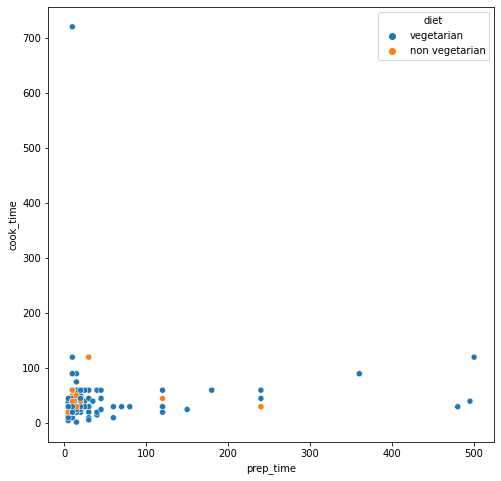

In [41]:
fig=plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x='prep_time',y='cook_time',hue='diet')

<font color='red'>**It can be observed that most of the food items with smaller preparation time has lesser cooking time. However there are some items that require quite high preparation time but less cooking time.**</font>

###<font color='Magenta'>**Creating a new feature and observing how it varies**</font>

<font color='green'>**Let's make a new feature combining preparation time and cooking time and see how it varies with different features.**</font>

In [42]:
df['Total_time']=df['prep_time']+df['cook_time']
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0
...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East,35.0
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West,80.0
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,NaN,NaN,sweet,dessert,Jammu & Kashmir,North,NaN
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central,65.0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


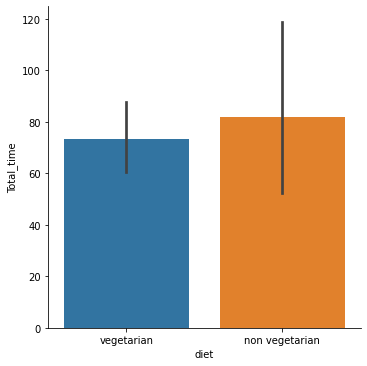

In [43]:
sns.factorplot(data=df,x='diet',y='Total_time',kind='bar')

<font color='red'>**It can be observed that there isn't much variation in the total time required to prepare and cook an item based on the diet**</font>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


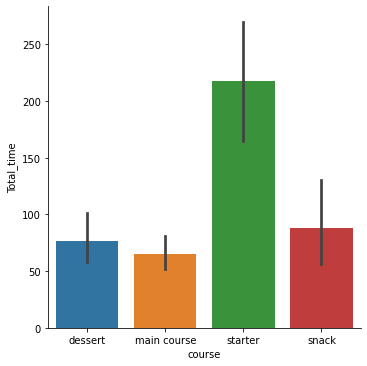

In [44]:
sns.factorplot(data=df,x='course',y='Total_time',kind='bar')

<font color='red'>**It can be observed that it takes maximum time to make starters (approx 220 mins) wheras the rest of the courses take less time**</font>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


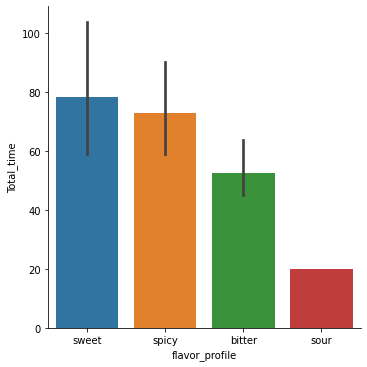

In [45]:
sns.factorplot(data=df,x='flavor_profile',y='Total_time',kind='bar')

<font color='red'>**It can be observed that it takes maximum time to make sweet items followed by spicy, bitter and sour dishes**</font>

###<font color='Magenta'>**Using Wordcloud to find the most common ingredients used in Indian cuisine**</font>

<font color='green'>**A word cloud is a visual representation of words.They are used to highlight popular words and phrases based on frequency and relevance.There is a module in python known as wordcloud which helps us in this implementation. We have installed and imported it in our code**</font>

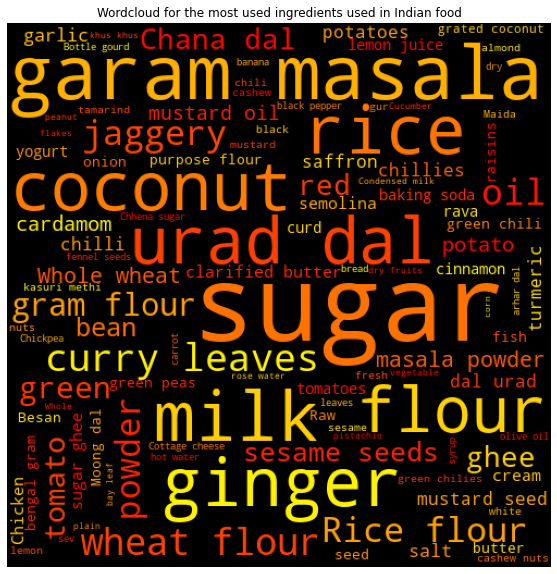

In [54]:
ingredients=[]
for i in range(0,len(df)):
      text = df['ingredients'][i].split(',') # Extracting the ingredients for each row
      text = ','.join(text)
      ingredients.append(text)
      text = ','.join(ingredients) # Storing all the ingredients in text separated by ,

wordcloud = WordCloud(width = 500, height = 500, colormap = 'autumn',background_color ='black', min_font_size = 8).generate(text)  
'''
The arguments used are :
width : Width of the canvas          
height : Height of the canvas
colormap : Which color palette to use
background_color : Can be changed to specify the background color
min_font_size : Smallest font size to use and will stop when there is no more room in this size.    
'''  

plt.figure(figsize = (10, 10))
plt.title("Wordcloud for the most used ingredients used in Indian food")
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()



<font color='red'>**It can be observed that the most commonly used ingredients in Indian food are sugar, coconut, urad dal, garam masala, ginger, milk,flour and rice. These items are pretty common and widely used all across India.**</font>

###<font color='Magenta'>**Using Wordcloud to find the most common ingredients used in different flavour profiles**</font>

In [55]:
#Defining a function to plot wordclouds for different flavour profiles

def wc(info,name,mask):# info :The corresponding data set , name :Name of the flavour profile whose info is passed, mask :Image in which shape the wordcloud is to be generated 
  ingredients=[]
  for i in range(0,len(info)):
      text = info['ingredients'][i].split(',')
      text = ','.join(text)
      ingredients.append(text)
      text = ' '.join(ingredients)


  wordcloud = WordCloud(width = 400, height = 400, colormap = 'Pastel1',background_color ='salmon', min_font_size = 8,mask=mask).generate(text)                  

  plt.figure(figsize = (10, 10), facecolor = None) 
  plt.title("Wordcloud for "+name)
  plt.imshow(wordcloud) 
  plt.axis('off') 
  plt.show()



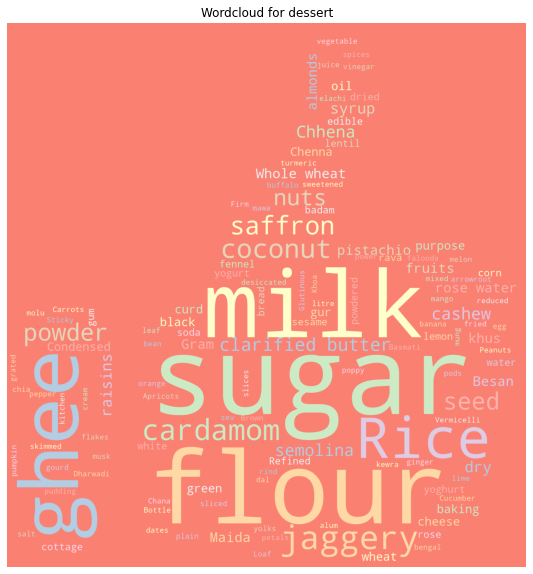

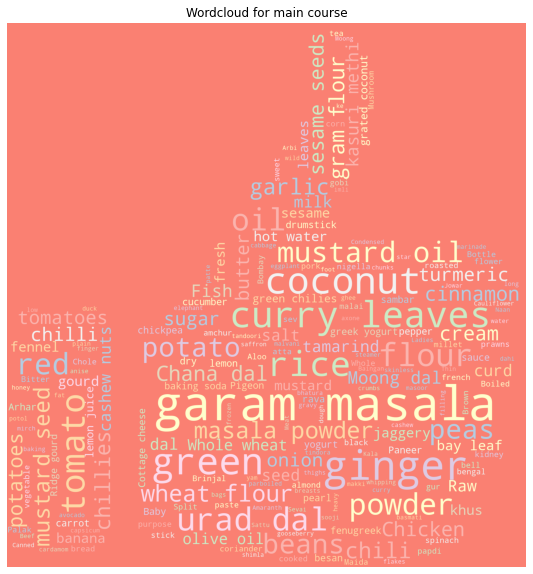

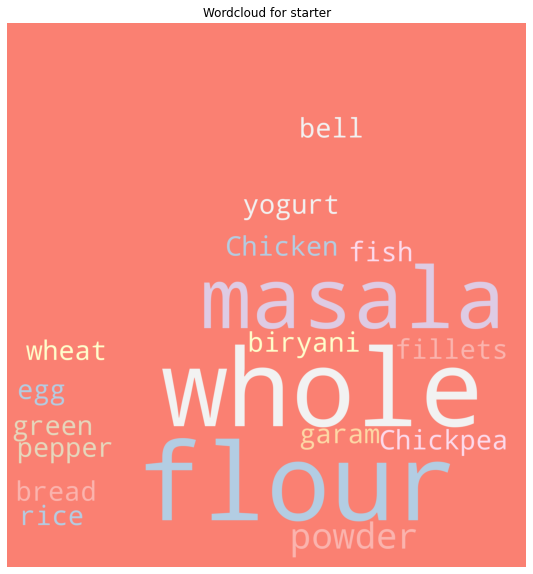

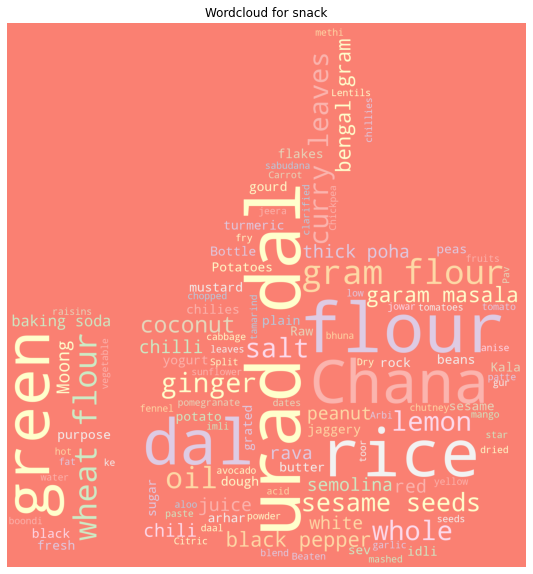

In [56]:
s=df['course'].unique() # Getting the unique flavour profiles present
mask = np.array(Image.open('/content/mask_like.png')) # Forming a mask i.e shape to be used while creating wordcloud
for i in s:
  info=df[df['course']==i].reset_index() # Extracting information for each flavour profile 
  wc(info,i,mask)

<font color='red'>**It can be observed that the most commonly used ingredients in**</font>

*   <font color='green'>**Dessert are milk, sugar, rice, flour and jaggery**
*   **Main course are garam masala, ginger, urad dal, ginger, mustard oil, coconut and curry leaves**
*   **Starter are flour, chickpea, masala, chicken and fish**
*   **Snack are urad dal, Chana, rce, flour and garam masala**</font>





###<font color='Magenta'>**State wise analysis :-**</font>

1.   Distribution of flavour profile based on diet
2.   Distribution of course based on diet
3.   How the cooking time varies with the preparation time based on diet
4.   Pie chart representing the distribution of vegetarian and non vegetarian dishes





In [57]:
def state_cuisine(name):
  data_info=df[df['state']==name].reset_index()
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  sns.countplot(ax=axes[0],x="flavor_profile", data=data_info,palette="Set1",hue='diet')
  axes[0].set_title("Distribution of falvour profile in "+name)

  sns.countplot(ax=axes[1],x="course", data=data_info,palette="Set2",hue='diet')
  axes[1].set_title("Distribution of courses in "+name)

  
  sns.scatterplot(ax=axes[2],x="prep_time",y='cook_time', data=data_info,hue='diet')
  axes[2].set_title("Cooking time vs Prep time in "+name)

  pie_data = data_info['diet'].value_counts().reset_index()
  pie_data.columns = ['region','count']
  fig=plt.figure(figsize=(5,5))
  explode=(0,0.1)
  ax = fig.add_axes([0,0,1,1])
  ax.pie(pie_data['count'], labels=pie_data['region'],shadow=True,explode=explode,autopct='%1.1f%%',startangle=90)
  plt.show()  



Enter the state whose cusine you want to visualize Punjab


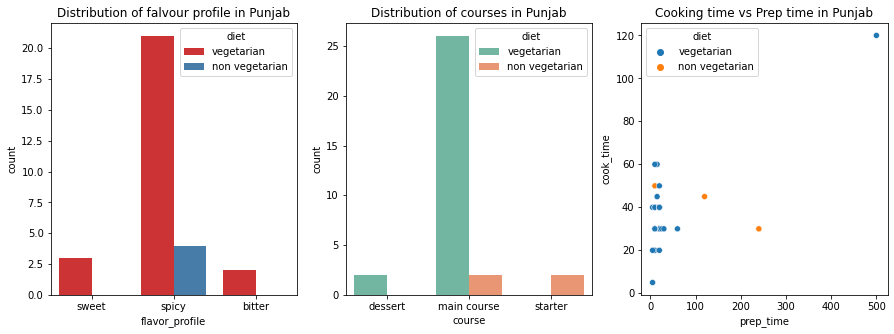

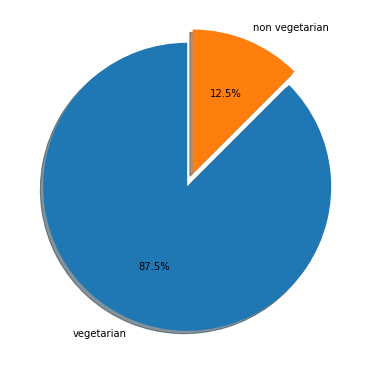

In [59]:
state_name=input('Enter the state whose cusine you want to visualize ') # Taking the name of the state as input
try:
  state_cuisine(state_name)
except:
  print("Sorry the state name is wrong") # If the name entered is wrong